In [1]:
#run below script to create subclusters & preprocess, change sample_id, final_cluster filename & create subdirs

In [ ]:
import sys
sys.path.append("../code")

In [ ]:
from code.data_prep.io import *
from code.data_prep.processing import *
from code.plotting.plot_settings import *
from code.plotting.palette import *

In [1]:
import scanpy as sc
from pathlib import Path
import numpy as np
import pandas as pd

sc.settings.verbosity=3

from datetime import datetime
now = datetime.now()
timestamp = now.strftime("%Y%m%d")

#directory
main_dir = "/projects/robson-lab/research/endometriosis/"
sample_id = "Endometriosis-revision-3"

#load dataset
final_cluster = sc.read(f"{main_dir}data/h5ad/{sample_id}/{sample_id}-scrubs-clean-final-20220103.h5ad")

#define what's in each subcluster
Epithelial = ["epithelial 1","epithelial 2","cilliated epithelial","mesothelial"]
Fibroblast = ["fibroblast 1","fibroblast 2","fibroblast 3"]
Stromal = ["fibroblast 1","fibroblast 2","fibroblast 3","mural cells"]
Myeloid = ["myeloid 1","myeloid 2","myeloid 3","pDC","mast cells"]
TNK = ["plasma B-lymphocyte","B-lymphocytes","T-lymphocytes","NK cells"]
Endothelial = ["endothelial"]

In [3]:
final_cluster.obs.sample_type.value_counts()

Eutopic           30176
Ectopic Ovary     24982
Ectopic           24715
Ectopic Adj       14731
Eutopic Normal    13893
Name: sample_type, dtype: int64

In [7]:
#create lists to run loops
subdirs = ['Epithelial', 'Fibroblast', 'Stromal', 'Myeloid', 'TNK', 'Endothelial']
lists = [Epithelial, Fibroblast, Stromal, Myeloid, TNK, Endothelial]
subcluster_name = ['Epi', 'Fib', 'Stro','Mye', 'TNK', 'Endo']

for i,x,z in zip(subdirs, lists, subcluster_name): 
    sub_dir = f"{i}"
    adata = final_cluster[final_cluster.obs.celltype.isin(x)]
    
    adata.uns["sampleid"] = sample_id
    adata.uns["output_dir"] = f"{main_dir}data/h5ad/{sample_id}/"
    
    sc.pp.filter_genes(adata, min_cells=3)
    
    full = preprocess(adata, n_top_genes=1000)
    save_adata(full, f"{z}", subdir = sub_dir)

Trying to set attribute `.uns` of view, copying.


filtered out 2405 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:02)
extracting highly variable genes
    finished (0:00:07)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


Trying to set attribute `.uns` of view, copying.


filtered out 2408 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:07)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


Trying to set attribute `.uns` of view, copying.


filtered out 2235 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


Trying to set attribute `.uns` of view, copying.


filtered out 5030 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


Trying to set attribute `.uns` of view, copying.


filtered out 4837 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


Trying to set attribute `.uns` of view, copying.


filtered out 5245 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [8]:
#sanity check
mye = sc.read(f"{main_dir}data/h5ad/{sample_id}/Myeloid/{sample_id}-Mye-20220103.h5ad")

AnnData object with n_obs × n_vars = 12371 × 21606
    obs: 'sequencing_saturation', 'Patient_id', 'stage', 'scrublet_predicted_doublet', 'scrublet_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mitochondrial', 'log1p_total_counts_mitochondrial', 'pct_counts_mitochondrial', 'total_counts_hemoglobin', 'log1p_total_counts_hemoglobin', 'pct_counts_hemoglobin', 'library', '10x_chemistry', 'sample_name', 'sampleid', 'sample_type', 'leiden', 'leiden_R1', 'leiden_R2', 'leiden_R3', 'leiden_R4', 'leiden_R5', 'leiden_R6', 'leiden_R7', 'visible_doublet', 'cluster', 'cluster_R1', 'celltype', 'celltype_main'
    var: 'gene_ids', 'mitochondrial', 'hemoglobin', 'total_counts', 'n_cells_by_counts', 'ribosomal', 'cell_cycle', 'stress_response', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_cells'
    u

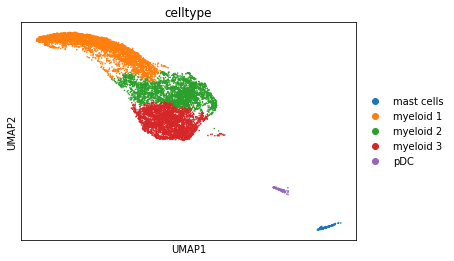

In [13]:
sc.pl.umap(mye, color=["celltype"])

In [9]:
print (mye.layers["raw"].max())
print (mye.layers["normed"].max())
print (mye.X.max())

40554.0
